# 심장 질병 예측(Heart disease analysis)

## 문제상황  

A병원은 매출 상승을 위해 고객 Care 관점에서 건광관리 운영프로그램을 기획 중이다. 특히 생명과도 직결될 수 있는 심장질환에  
대한 위험도가 높은 고객 대상으로 운영하려고 한다. 환자들의 개인 프로필 정보와 건강 데이터를 활용하여 심장질환에 대한 위험도를 측정하고  
이를 기반으로 고객 선정과 함께 건강관리 운영프로램을 운영할 계획이다.

## 문제 해결 프로세스  

1. 문제정의

- 매출 감소로 인한 새로운 서비스 기획 및 운영 필요

2. 기대효과

- 심장질환 관리 프로그램 운영을 위한 고객 선정 (매출상승), 고객만족도 증가  

3. 해결방안

- 심장질환 가능성이 높은 고객을 예측 및 선정하여 관리 프로그램 운영

4. 성과측정

- 고객 설문 조사 만족도 및 매출 증가 효과 모니터링

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('C:/Users/USER/Desktop/Practice Project - ML/심장 질병 예측/심장 질병 예측.csv')
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [3]:
df.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

#### 변수 해석 3가지  

1. 결측치 존재 여부

- 전체 데이터에서 결측치가 존재하지 않는다.

- 만약, 결측치가 존재했다면 전체 데이터의 약 5%정도 미만의 개수는 제거해도 좋다.

- 결측치를 대체하는 경우, object형태는 최빈값으로 대체하고, int64 or float64형태는 평균으로 대체하거나 KNN을 사용할 수 있다.

2. 데이터 타입 설명

- 종속변수, 독립변수 모두 float64형태로 구성되어 있다.

- 종속변수 형태는 float64이나 여부를 나타내는 변수이기에 의미상 object이다.

3. 컬럼 설명

- HeartDiseaseorAttack : 심장질환여부
- HighBP : 고혈압
- HighChol : 혈중콜레스트롤
- CholCheck : 최근5년이내 콜레스트롤 검사여부
- BMI : 체질량지수
- Smoker : 흡연여부
- Stroke : 뇌졸중여부
- Diabetes : 당뇨병여부
- PhysActivity : 30일이내운동여부 경과일
- Fruits : 하루1회 과일섭취 여부
- Veggies : 하루1회 채소섭취 여부
- HvyAlcoholConsump : 과음 여부
- MentHlth : 최근 30일 스트레스 일수
- PhysHlth : 최근 30일 신체건강 나쁨 일수
- DiffWalk : 계단/걸음 문제
- AnyHealthcare : 건강보험여부
- NoDocbcCost : 12개월내 병원방문이 필요하나 방문N(비용문제)
- GenHlth : 일반적 건강상태
- Sex : 성별
- Age : 연령
- Education : 교육수준
- Income : 소득수준

In [4]:
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


우선 describe로 이상치를 판단하기 위해서는 mean, min, max 값을 확인하는 것이 좋다. mean과 min, mean과 max 값이 std에 비해 한참 차이가 난다면, 이상치가 있을 가능성이 높다.

이러한 이상치를 정확히 판단하기 위해서는 아래와 같이 boxplot으로 시각화하여 보는 것이 정확하다.

In [5]:
outlier = pd.melt(df, var_name = '이상치 탐색 변수', value_name = '이상치 탐색 값')
outlier

,이상치 탐색 변수,이상치 탐색 값
0,HeartDiseaseorAttack,0.0
1,HeartDiseaseorAttack,0.0
2,HeartDiseaseorAttack,0.0
3,HeartDiseaseorAttack,0.0
4,HeartDiseaseorAttack,0.0
...,...,...
5580955,Income,7.0
5580956,Income,4.0
5580957,Income,2.0
5580958,Income,1.0


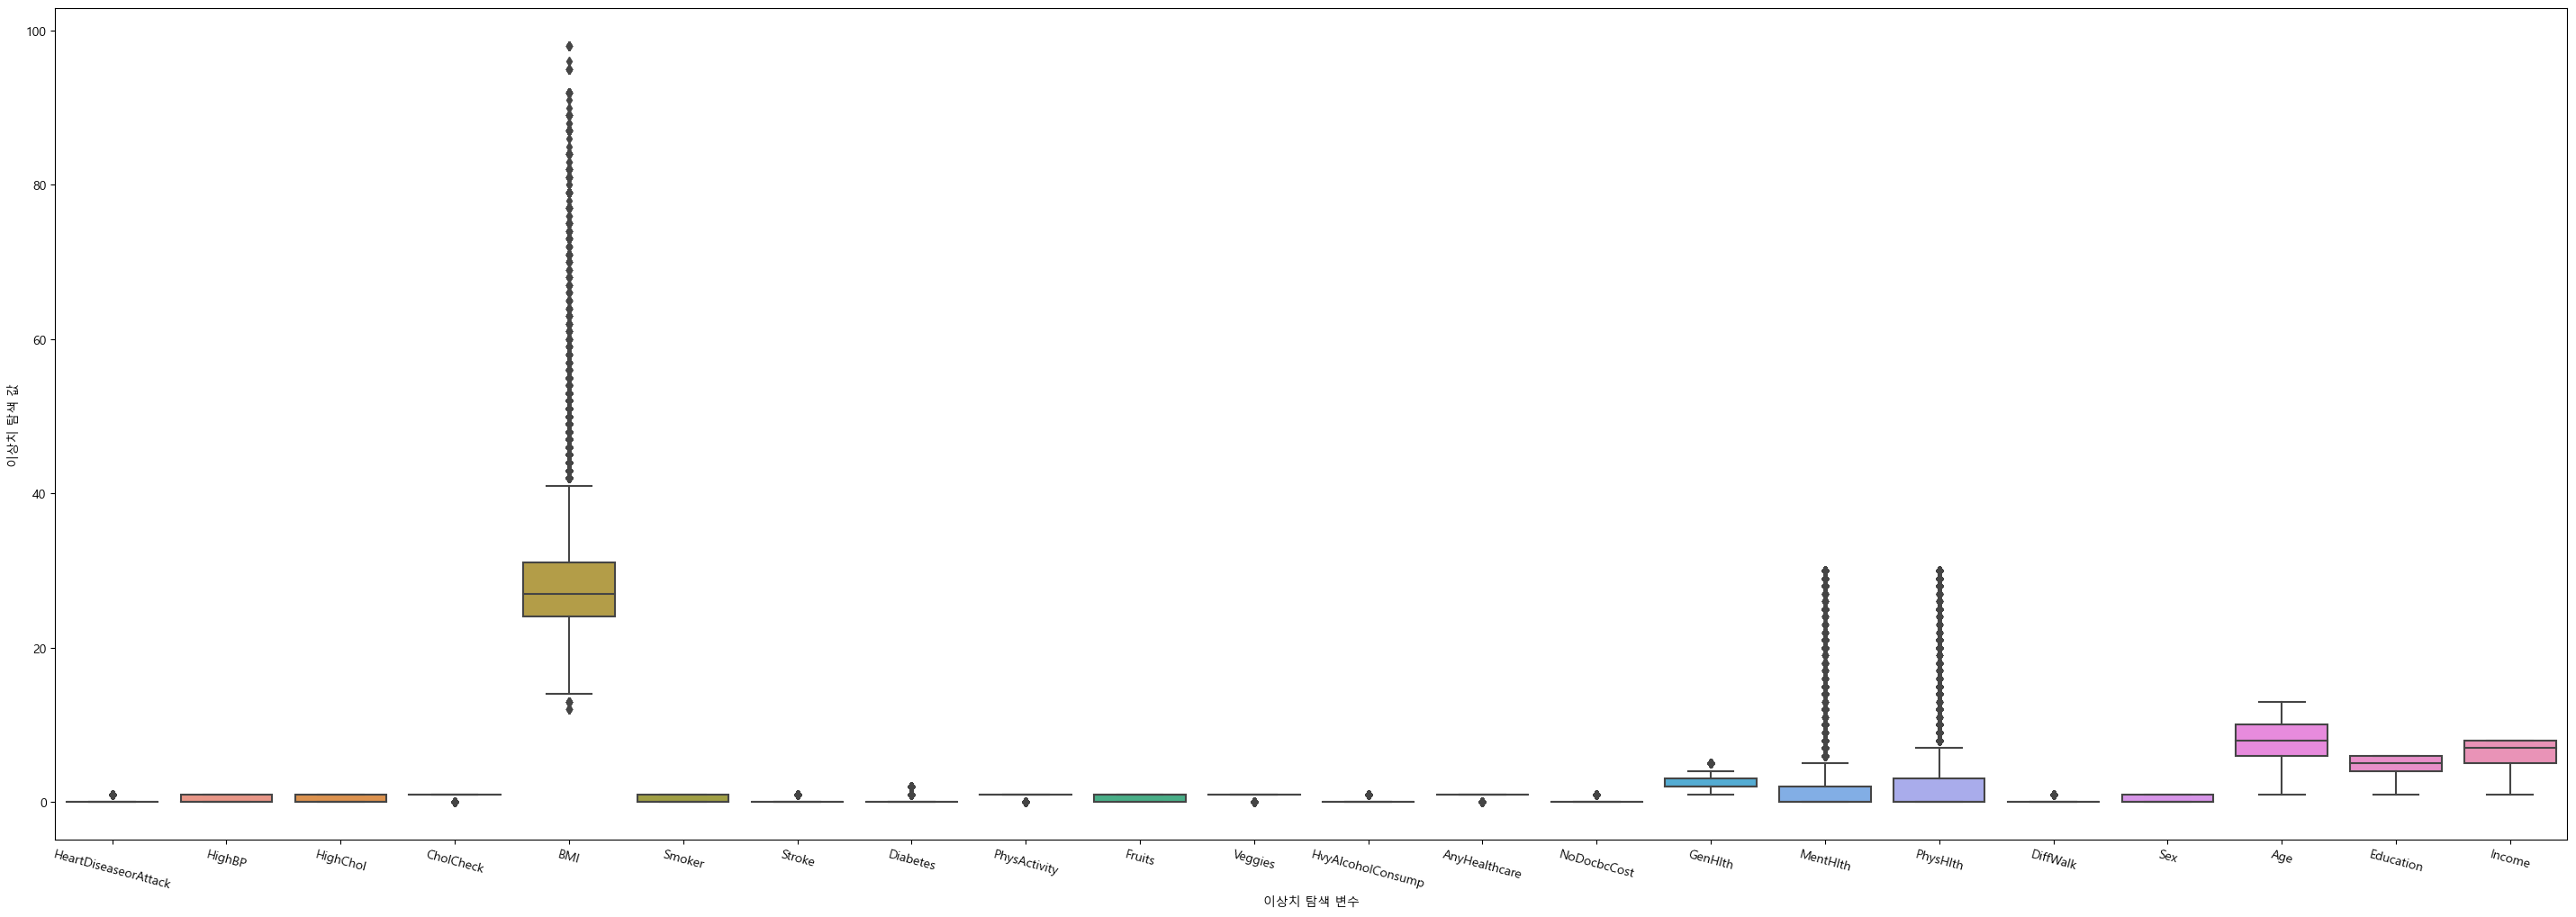

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
rc("font", family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize = (36,12))
sns.boxplot(x = '이상치 탐색 변수', y = '이상치 탐색 값', data = outlier)
plt.xticks(range(22), df.columns)
plt.xticks(rotation=-15)
plt.show()

이상치를 탐색하기 위해서 수치형 변수들만 선택해서 boxplot으로 시각화하였다. 이상치의 값이 연속적으로 나타나면, 보통 의미있는 값일 확률이 높기 때문에 따로 제거하거나 대체하지 않고, 눈에 띄는 이상치가 있을 경우에는 보통 제거하거나 대체하는 경우가 많다.(예를 들어, Age 변수가 999값이 있으면 제거하거나 대체하는 것이 옳다.)

In [7]:
df['HeartDiseaseorAttack'].value_counts()

0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64

In [8]:
print("심장질환 발병률 : ", (23893 / (23893 + 229787))*100)

심장질환 발병률 :  9.418558814254178


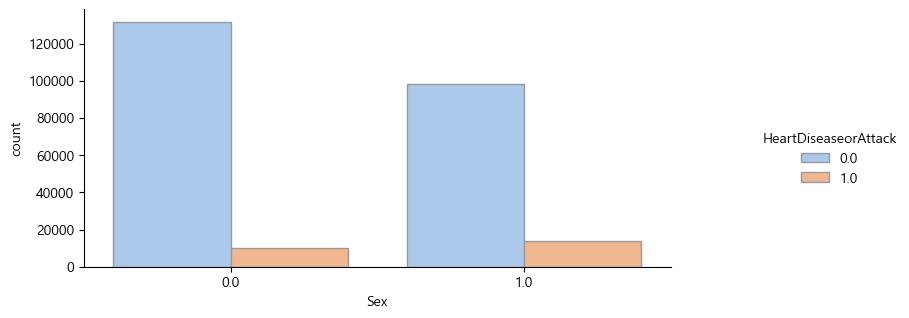

In [9]:
sns.catplot(x="Sex", kind="count", hue="HeartDiseaseorAttack",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(10, 3)

In [10]:
df_gp = df.groupby('Sex')['HeartDiseaseorAttack'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp = df_gp.sort_values(by=['ratio'], ascending=False)
df_gp

,count,sum,ratio
Sex,,,
1.0,111706,13688.0,12.3
0.0,141974,10205.0,7.2


성별에 따른 심장질환 발병률 비교를 실시한다. 여성일수록 심장 질병 발병률이 높은것으로 나타난다 

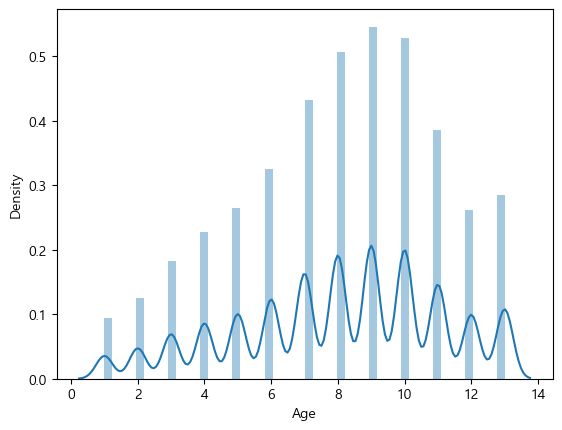

In [11]:
sns.distplot(df['Age']);

In [12]:
import numpy as np
df['Age_gp'] = np.where (df['Age'] <= 4, '4세이하', 
                           np.where(df['Age'] <= 10, '4-10세 이하', '10세 초과'))

df[['Age','Age_gp']]

,Age,Age_gp
0,9.0,4-10세 이하
1,7.0,4-10세 이하
2,9.0,4-10세 이하
3,11.0,10세 초과
4,11.0,10세 초과
...,...,...
253675,5.0,4-10세 이하
253676,11.0,10세 초과
253677,2.0,4세이하
253678,7.0,4-10세 이하


In [19]:
df_gp = df.groupby('Age_gp')['HeartDiseaseorAttack'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp = df_gp.sort_values(by=['ratio'], ascending=False)
df_gp

,count,sum,ratio
Age_gp,,,
10세 초과,56876,11199.0,19.7
4-10세 이하,158560,12292.0,7.8
4세이하,38244,402.0,1.1


연령에 따른 심장질환 발병률 비교를 실시한다. 연령(Age)의 분포를 확인한 결과, 4세와 10세 사이의 나이를 평균으로 측정하고 3개의 구간으로 구간화를 진행할 필요가 있어보인다. 10세 초과일수록 심장 질병 발병률이 높은것으로 나타난다

## 심장 질병 영향 인자 탐색

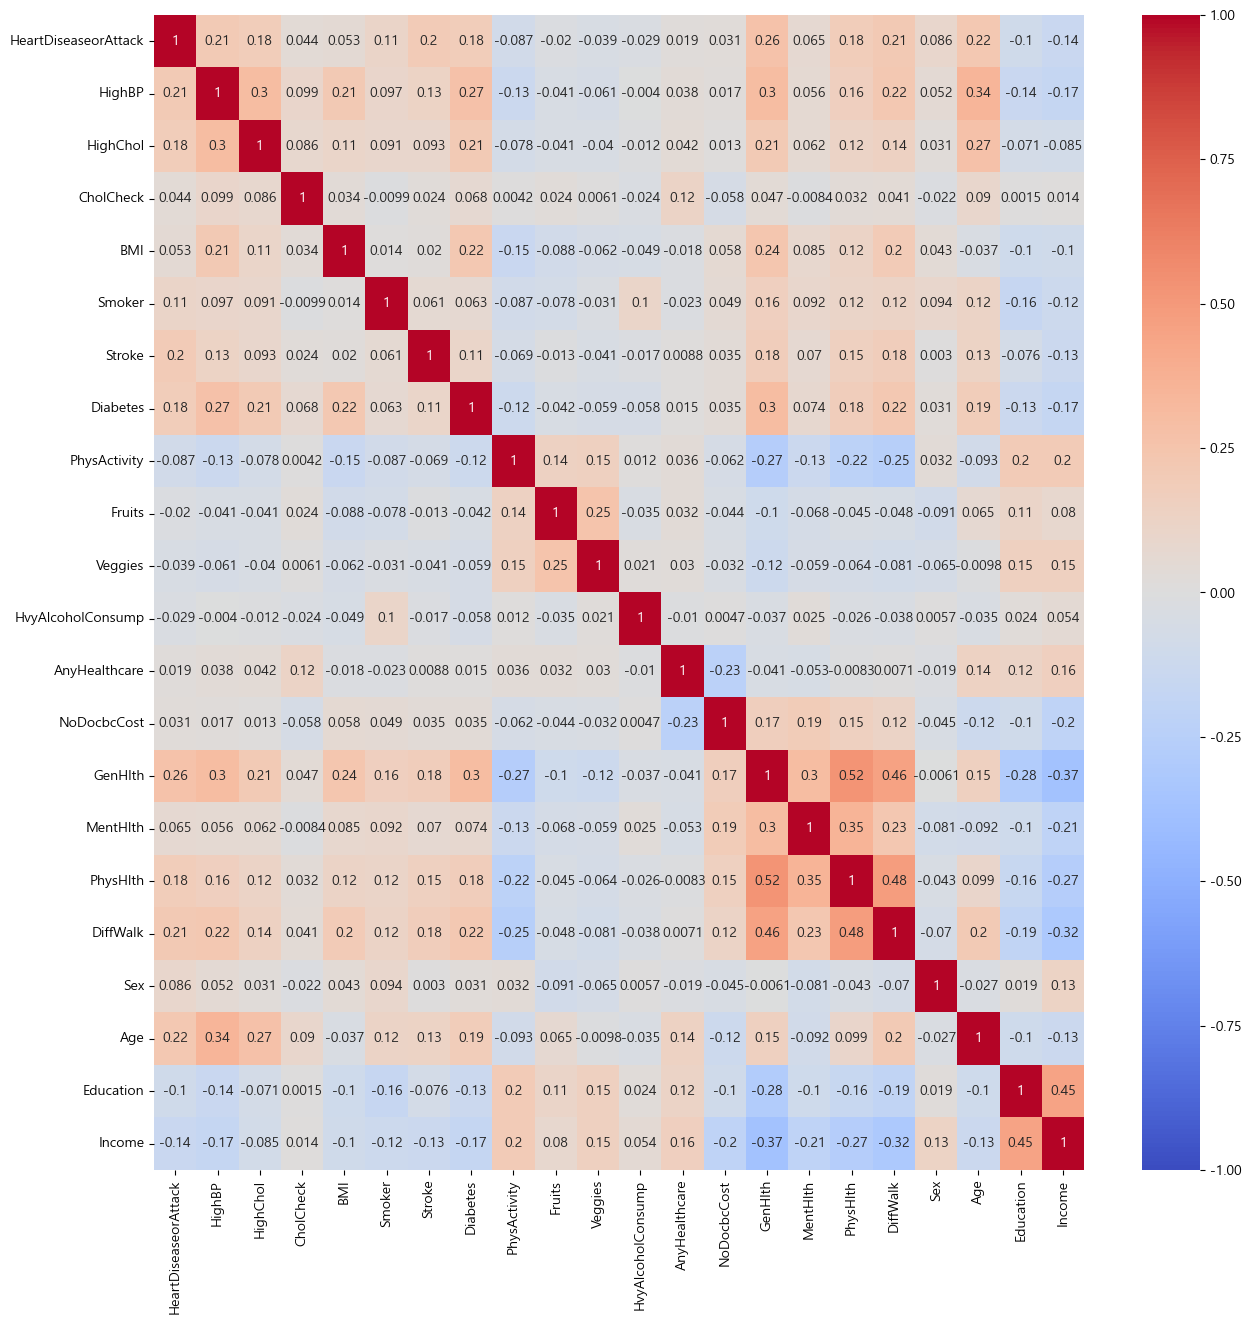

In [14]:
sns.heatmap(df.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm');
plt.gcf().set_size_inches(15   , 15)

vmin,vmax는 색상의 범위를 지정해주는 함수이다. 모든 변수가 수치형 변수이기 때문에 heatmap을 통해서 전체적인 시각화가 가능하다. 한눈에 봐도 서로 높은 상관성을 보이는 변수는 존재하지 않는다

In [15]:
df_corr = pd.DataFrame(df.corr().iloc[:,0])
df_corr = df_corr.iloc[1:,:]
df_corr.columns = ['corr']
df_corr

,corr
HighBP,0.209361
HighChol,0.180765
CholCheck,0.044206
BMI,0.052904
Smoker,0.114441
Stroke,0.203002
Diabetes,0.180272
PhysActivity,-0.087299
Fruits,-0.019790
Veggies,-0.039167


심장질환과의 상관계수만 확인할 필요가 있어보이기에 첫번째 컬럼만 가져온다. 종속변수가 이진분류이기 때문에 독립변수와 상관계수가 높은 변수들이 존재하지 않는다. 형태뿐만 아니라 의미상 연속형 변수였다면 더욱 상관성이 높은 변수들이 존재할것이다. 하지만, 의미있는 변수를 찾는데 도움을 줄 수 있으니 탐색이 필요하다

In [16]:
df_corr [ abs(df_corr['corr']) > 0.2 ]

,corr
HighBP,0.209361
Stroke,0.203002
GenHlth,0.258383
DiffWalk,0.212709
Age,0.221618


상관계수 0.2이상인 변수들만 선택해서 탐색한다

         count      sum  ratio
HighBP                        
1.0     108829  17928.0   16.5
0.0     144851   5965.0    4.1


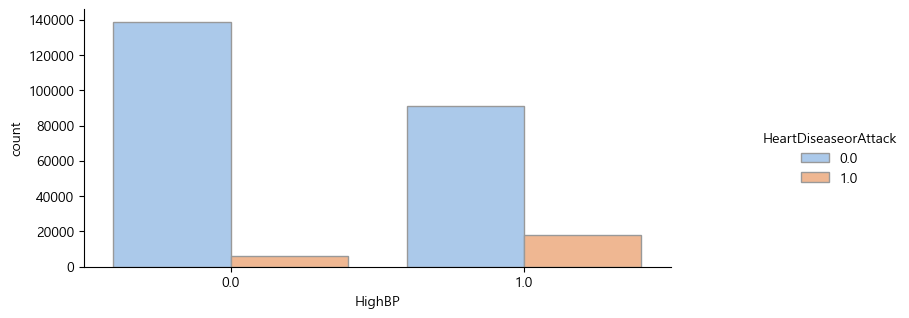

In [20]:
sns.catplot(x="HighBP", hue="HeartDiseaseorAttack", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(10, 3)


df_gp = df.groupby('HighBP')['HeartDiseaseorAttack'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp = df_gp.sort_values(by=['ratio'], ascending=False)
print(df_gp)

HighBP(고혈압)에 따른 심장 질병 발병률 분석을 실시한 결과, 고혈압이 있으면 더욱 심장 질병 발병률이 높다

         count      sum  ratio
Stroke                        
1.0      10292   3937.0   38.3
0.0     243388  19956.0    8.2


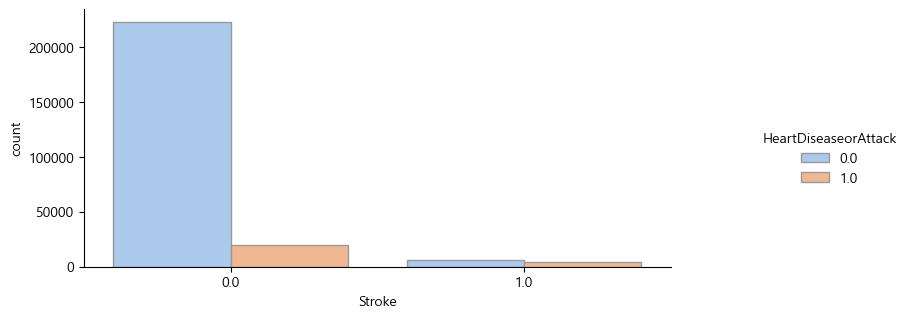

In [21]:
sns.catplot(x="Stroke", hue="HeartDiseaseorAttack", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(10, 3)


df_gp = df.groupby('Stroke')['HeartDiseaseorAttack'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp = df_gp.sort_values(by=['ratio'], ascending=False)
print(df_gp)

Stroke(뇌졸증 여부)에 따른 심장 질병 발병률 분석을 실시한 결과, 뇌졸증이 있으면 더욱 심장 질병 발병률이 높다

         count     sum  ratio
GenHlth                      
5.0      12081  4107.0   34.0
4.0      31570  6728.0   21.3
3.0      75646  7914.0   10.5
2.0      89084  4128.0    4.6
1.0      45299  1016.0    2.2


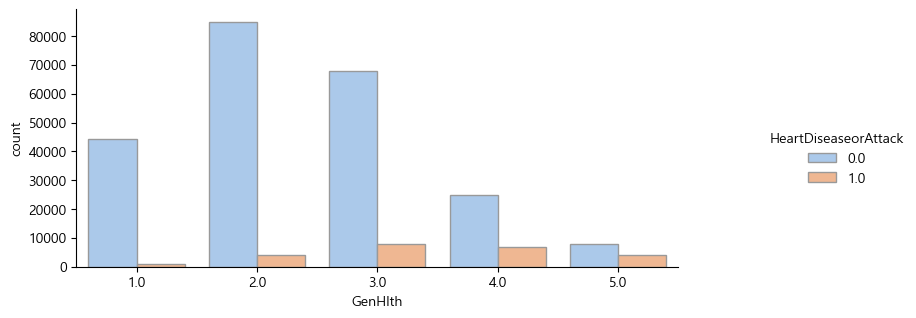

In [22]:
sns.catplot(x="GenHlth", hue="HeartDiseaseorAttack", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(10, 3)


df_gp = df.groupby('GenHlth')['HeartDiseaseorAttack'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp = df_gp.sort_values(by=['ratio'], ascending=False)
print(df_gp)

GenHlth(일반적 건강상태)에 따른 심장 질병 발병률 분석을 실시한 결과, 일반적 건강상태가 나빠질수록 심장 질병 발병률이 높아진다

           count      sum  ratio
DiffWalk                        
1.0        42675   9915.0   23.2
0.0       211005  13978.0    6.6


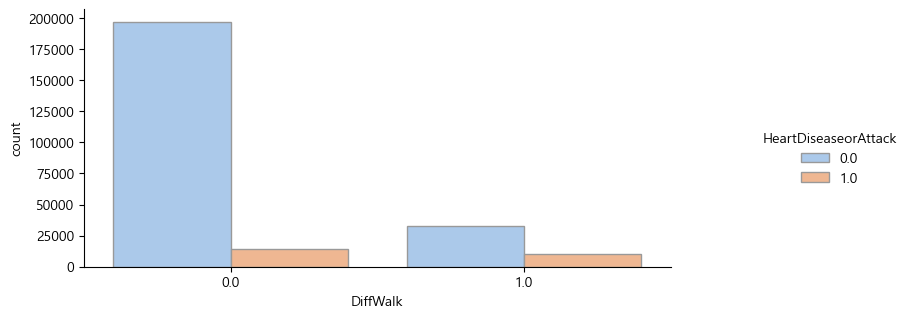

In [23]:
sns.catplot(x='DiffWalk', hue="HeartDiseaseorAttack", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(10, 3)


df_gp = df.groupby('DiffWalk')['HeartDiseaseorAttack'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp = df_gp.sort_values(by=['ratio'], ascending=False)
print(df_gp)

DiffWalk(계단/걸음 문제)에 따른 심장 질병 발병률 분석을 실시한 결과, 걸음 문제가 있으면 더욱 심장 질병 발병률이 높다

      count     sum  ratio
Age                       
13.0  17363  4159.0   24.0
12.0  15980  3093.0   19.4
11.0  23533  3947.0   16.8
10.0  32194  4193.0   13.0
9.0   33244  3358.0   10.1
8.0   30832  2253.0    7.3
7.0   26314  1425.0    5.4
6.0   19819   712.0    3.6
5.0   16157   351.0    2.2
4.0   13823   193.0    1.4
3.0   11123   126.0    1.1
2.0    7598    54.0    0.7
1.0    5700    29.0    0.5


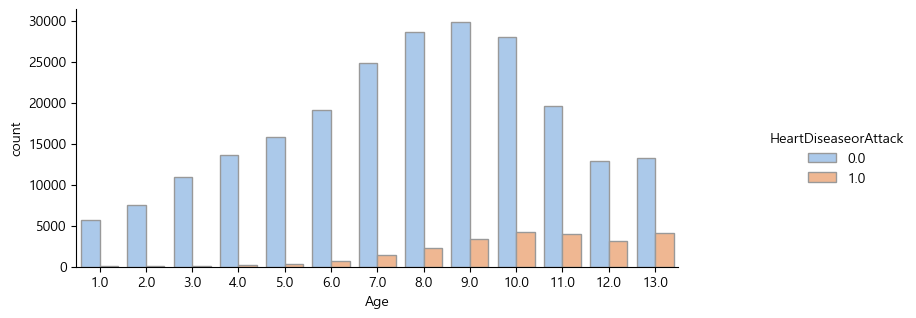

In [24]:
sns.catplot(x="Age", hue="HeartDiseaseorAttack", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(10, 3)


df_gp = df.groupby('Age')['HeartDiseaseorAttack'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp = df_gp.sort_values(by=['ratio'], ascending=False)
print(df_gp)

Age(나이)에 따른 심장 질병 발병률 분석을 실시한 결과, 나이가 많을수록 심장 질병 발병률이 높아진다

## ML 활용 심장 질병 예측

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X=df.drop(['HeartDiseaseorAttack', 'Age_gp'], axis=1)
Y=df['HeartDiseaseorAttack']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(177576, 21)
(177576,)
(76104, 21)
(76104,)


- 데이터 분리할 때, 분류분석은 stratify를 통해 층화추출하고 회귀분석은 동일한 비율로 나눌수가 없기 때문에 stratify 옵션을 사용하지 않는다

- 보통 데이터 행의 개수와 비슷한 차원이 있는 컬럼은 제거하고 모델링 하는 것이 좋다. 예를 들어, id 같은 것들. 각각의 값이 전부 유니크하면 제거한다

- 1개 컬럼에 모든 값이 동일하면 데이터 분리할 때 제거하는 것이 좋다

- 새로 만든 파생변수나 기존 컬럼과 동일한 의미의 컬럼들도 제거한다(단, 유의미한 변수라고 생각하면 그대로 둔다)

- 범주형 변수의 값이 3-4개가 적당하고 20개가 넘는 변수는 보통 삭제하고 모델링하는게 좋은데, 처음에는 어떤 변수가 중요한지 모르니 일단 전부 투입시키고 하는게 좋다. 이러한 경우, 범주형 변수들을 인코딩 하면 차원이 워낙 많다보니까 오류 방지 차원에서 train과 test의 값을 합쳐서 만들고 fit 시켜줘야한다

- 분석 시간이 많다 = 범주형 변수들을 하나하나 제거해보면서 모델링

- 분석 시간이 없다 = 효율성을 위해 train과 test의 값을 한번에 fit해서 모델링

In [26]:
pd.Series(y_train).value_counts()

0.0    160851
1.0     16725
Name: HeartDiseaseorAttack, dtype: int64

In [30]:
print("stratify='Y' 옵션 결과 확인(train) : ", (16725/(160851+16725))*100)

stratify='Y' 옵션 결과 확인(train) :  9.418502500337883


In [28]:
pd.Series(y_test).value_counts()

0.0    68936
1.0     7168
Name: HeartDiseaseorAttack, dtype: int64

In [31]:
print("stratify='Y' 옵션 결과 확인(test) : ", (7168/(68936+7168))*100)

stratify='Y' 옵션 결과 확인(test) :  9.4186902133922


위의 stratify='Y' 옵션 결과를 확인할 결과, 거의 동일한 비율로 나누어진 것을 알 수 있다

In [32]:
from sklearn.metrics import classification_report
rfc = RandomForestClassifier(random_state = 2023, max_depth=6)
rfc.fit(x_train, y_train)

y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95    160851
         1.0       0.76      0.02      0.04     16725

    accuracy                           0.91    177576
   macro avg       0.83      0.51      0.50    177576
weighted avg       0.89      0.91      0.87    177576

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     68936
         1.0       0.69      0.02      0.04      7168

    accuracy                           0.91     76104
   macro avg       0.80      0.51      0.49     76104
weighted avg       0.89      0.91      0.86     76104



1. precision  

- 심장 질병이 발병할 것 같은 환자들을 예측한 환자들 중에서 실제로 심장 질병이 발병한 환자의 확률

- 장점 : 최대한 많은 환자들에게 기획 및 운영이 가능하다.

- 단점 : 실제로 그렇지 않은 환자들이 포함될 수 있다.


2. recall  

- 실제로 심장 질병이 발병한 환자들중에서 심장 질병 발병 예측을 맞춘 확률

- 장점 : 실제로 심장 질병이 발병할 것 같은 환자들만 관리할 수 있다.

- 단점 : 모수가 작아지기 때문에 매출 증가 효과가 나타나지 않을 수 있다.

3. support

- 7168명 중에 약 140명을 맞춰서 recall 값이 0.02값이 나왔다

- y_pred_test 1의 값인 192명중에 약 140명이 존재한다는 의미이다

In [33]:
pd.Series(y_pred_train).value_counts()

0.0    177089
1.0       487
dtype: int64

In [34]:
pd.Series(y_pred_test).value_counts()

0.0    75912
1.0      192
dtype: int64

In [36]:
from sklearn.preprocessing import Binarizer

Input_threshold = 0.41

pred_proba_test = rfc.predict_proba(x_test)[:,1].reshape(-1,1)
custom_predict = Binarizer(threshold=Input_threshold).fit_transform(pred_proba_test)

print(classification_report(y_test, custom_predict))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     68936
         1.0       0.60      0.06      0.11      7168

    accuracy                           0.91     76104
   macro avg       0.75      0.53      0.53     76104
weighted avg       0.88      0.91      0.87     76104



In [37]:
pd.Series(custom_predict.reshape(-1)).value_counts()

0.0    75404
1.0      700
dtype: int64

4. threshold  

- threshold를 증가시키면, 진짜 정답일 데이터를 예측할 것이므로 precision 값이 증가 (예측하는 개수 감소)

- threshold를 감소시키면, 조금 이라도 가능성이 있는 정답을 더 많이 예측하므로 recall 값이 증가 (예측하는 개수 증가)

- 7168명 중에 약 420명을 맞춰서 recall 값이 0.06값이 나왔다

- y_pred_test 1의 값인 700명중에 약 420명이 존재한다는 의미이다

- precision은 적어도 60으로 맞추고 recall을 증가하는 방향으로 threshold를 조정한 결과, 이전보다 약 3배 증가한 모수가 생성되었다

- 실제로 심장 질병이 발병할 것 같은 환자들만 기획 및 운영해야하기에 recall 값을 증가시키는 방향이 필요하다

In [38]:
from sklearn.metrics import roc_auc_score

y_pred_train_proba = rfc.predict_proba(x_train)[:, 1] 
y_pred_test_proba = rfc.predict_proba(x_test)[:, 1] 


roc_score_train = roc_auc_score(y_train, y_pred_train_proba)
roc_score_test = roc_auc_score(y_test, y_pred_test_proba)

print("roc_score_train :", roc_score_train)
print("roc_score_test :", roc_score_test)

roc_score_train : 0.8419266208719339
roc_score_test : 0.8432497958526362


5. roc_auc_score

- 이진 분류기의 성능을 평가할때 사용하는 지표로 100에 가까울 수록 모델 성능이 좋은 것이라고 할 수 있다.

- 다양한 threshold에 대한 이진분류기의 성능을 한번에 표시한 것이다.

- 여기서도 train과 test의 roc_score값이 차이가 거의 없으므로 과적합이 발생하지 않았다.

- 85에 가까운 값이 나온 것은 좋은 모델이라고 할 수 있다.

6. predict

- 0과 1로 나누는 것(0.5 이하는 0, 초과는 1)

7. predict_proba

- 0일 확률과 1일 확률로 나누는 것

In [39]:
from sklearn.metrics import roc_curve
def roc_curve_plot(y_test , pred_proba_c1):
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    plt.plot(fprs , tprs, label='ROC')
    plt.plot([0, 1], [0, 1], 'k--', label='Random', color='red')
  
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

roc_curve_plot에서 임곗값에 따른 FPR, TPR 값을 반환 받는다  

- FPR : 실제로는 음성인 데이터 중에서 분류기가 음성이 아니라 양성이라고 판별한 데이터의 비율(1 - 민감도)

- TPR : recall

- roc curve를 plot 곡선으로 그린다

- 가운데 대각선 직선을 그린다(기준선)

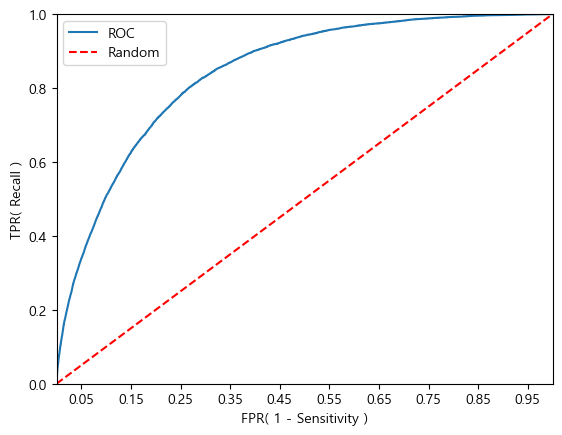

In [40]:
roc_curve_plot(y_train, y_pred_train_proba)

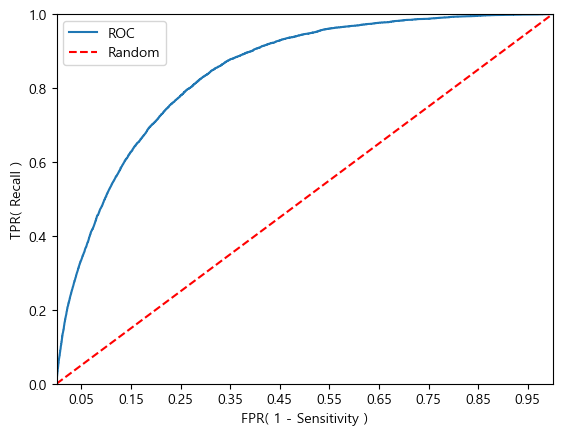

In [41]:
roc_curve_plot(y_test, y_pred_test_proba)

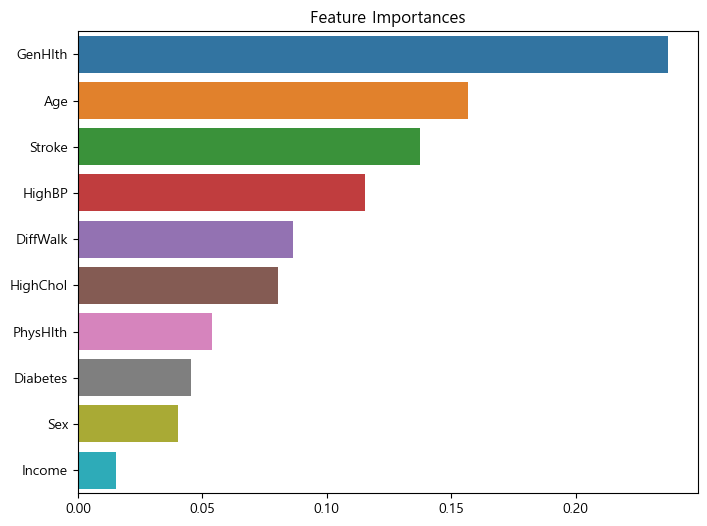

In [42]:
ftr_importances_values = rfc.feature_importances_ 
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:10]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

Feature IMP 분석을 통해 중요변수를 파악한다. 위의 상위 변수들을 살펴보면, GenHlth(일반적 건강상태)가 심장 질병 환자를 예측하는데 가장 중요한 변수임을 확인할 수 있다. 따라서 GenHlth(일반적 건강상태)를 주의 깊게 살펴가면서 예측을 진행하는 것이 좋은 판단이다

해당 데이터는 모든 변수가 중요성을 띄고 있으므로 하위 변수들을 제거하고 다시 모델링하는 것은 좋지않다

         count     sum  ratio
GenHlth                      
5.0      12081  4107.0   34.0
4.0      31570  6728.0   21.3
3.0      75646  7914.0   10.5
2.0      89084  4128.0    4.6
1.0      45299  1016.0    2.2


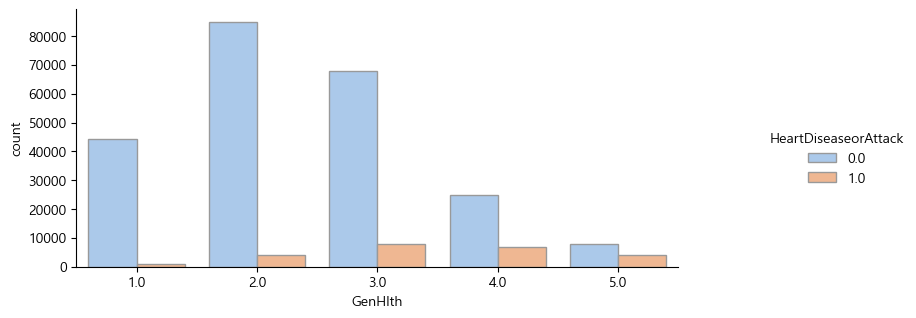

In [43]:
sns.catplot(x="GenHlth", hue="HeartDiseaseorAttack", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(10, 3)


df_gp = df.groupby('GenHlth')['HeartDiseaseorAttack'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp = df_gp.sort_values(by=['ratio'], ascending=False)
print(df_gp)

가장 중요한 변수에 대해 상세한 탐색을 실시한 결과, 일반적 건강상태가 나빠질수록 심장 질병 발병률이 높아지는 것을 확인할 수 있다. 일반적 건강상태가 가장 나쁠 경우, 무려 34%의 심장 질병 발병률을 가지고 있으므로 가장 중요한 변수임을 알 수 있다  

성과측정은 기본 베이스 코드(위의 전체 코드)를 가지고 익월 데이터를 추가 업로드해서 성과비교가 필요하다. 예를 들어, 위의 데이터로 예측한 심장 질병 환자들을 기반으로 환자 설문 조사 만족도 및 매출 증가 효과 모니터링을 통해 비교하는것이다.

ex) 심장 질병 예측 환자 = GenHlth가 5.0인 환자들 (일반적 건강상태가 나쁜 환자들)